<a href="https://colab.research.google.com/github/amitmldlai/Implement-Performance-metrics-without-Sklearn/blob/main/Implement_Performance_metrics_without_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [15]:
df = pd.read_csv('5_a.csv')
df.head(5)

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [23]:
def find_TPR_FPR(df):  # compute TPR, FPR 
  TP = ((df['y'] == 1.0 ) & (df['y_predicted'] == 1)).sum()
  FP = ((df['y'] == 0.0 ) & (df['y_predicted'] == 1)).sum()
  TN = ((df['y'] == 0.0 ) & (df['y_predicted'] == 0)).sum()
  FN = ((df['y'] == 1.0 ) & (df['y_predicted'] == 0)).sum()
  TPR = TP / (TP + FN) 
  FPR = FP / (FP + TN)
  return TPR, FPR


def auc(df):
  tpr, fpr = list(), list()
  sorted_df = df.sort_values(by=['proba'], ascending=False)
  unique_prob = sorted_df['proba'].unique()
  for prob in unique_prob:
    sorted_df['y_predicted'] = np.where(sorted_df['proba'] >= prob, 1, 0)  #  assign labels based on threshold
    tpr_fpr = find_TPR_FPR(sorted_df) 
    tpr.append(tpr_fpr[0])
    fpr.append(tpr_fpr[1]) 
  auc_score = np.trapz(tpr, fpr)  #  calculate area under the curve formed by TPR, FPR
  print(f'AUC Score : {auc_score}')

In [20]:
def other_scores(df):  
  df['y_predicted'] = np.where(df['proba'] >= 0.5, 1, 0)

  TP = ((df['y'] == 1.0 ) & (df['y_predicted'] == 1)).sum()
  FP = ((df['y'] == 0.0 ) & (df['y_predicted'] == 1)).sum()
  TN = ((df['y'] == 0.0 ) & (df['y_predicted'] == 0)).sum()
  FN = ((df['y'] == 1.0 ) & (df['y_predicted'] == 0)).sum()

  precision = TP/(FP+TP)  # calculate precision
  recall = TP/(FN+TP)  # calculate recall

  F1_score = 2*precision*recall/(precision + recall)  # calculate F1-Score
  confusion_matrix = np.matrix([TN,FN,FP,TP]).reshape(2, 2)  # calculate Confusion Matrix
  Accuracy_Score = (TN+TP)/(TN+FN+FP+TP)  # calculate Accuracy

  print(f'F1 Score : {F1_score}')
  print(f'Confusion Matrix : {confusion_matrix}')
  print(f'Accuracy : {Accuracy_Score}')
  return confusion_matrix

In [24]:
auc(df)
cm = other_scores(df)

AUC Score : 0.48829900000000004
F1 Score : 0.9950248756218906
Confusion Matrix : [[    0     0]
 [  100 10000]]
Accuracy : 0.9900990099009901


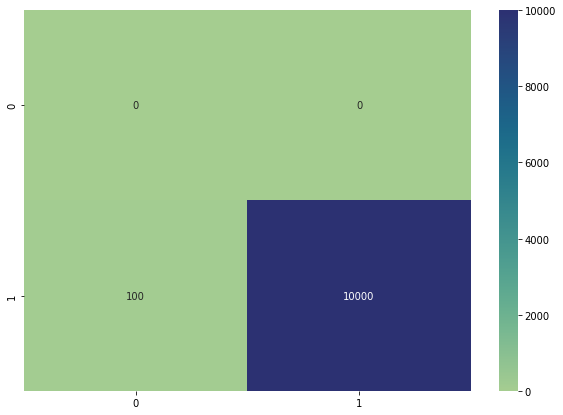

In [25]:
figure = plt.figure(figsize = (10, 7))
sns.heatmap(cm, fmt='.6g', cmap = 'crest', annot=True)
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [26]:
df = pd.read_csv('5_b.csv')
df.head(5)

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [27]:
auc(df)
cm_b = other_scores(df)

AUC Score : 0.9377570000000001
F1 Score : 0.2791878172588833
Confusion Matrix : [[9761   45]
 [ 239   55]]
Accuracy : 0.9718811881188119


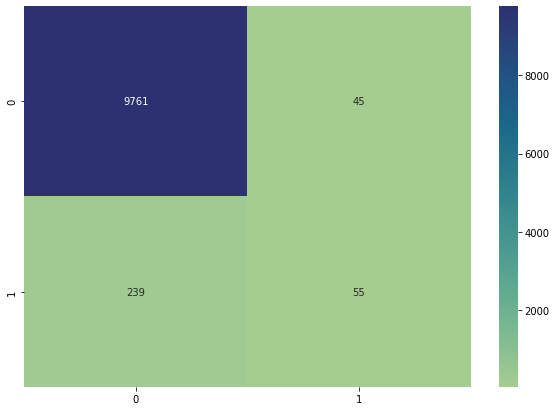

In [28]:
figure = plt.figure(figsize = (10, 7))
sns.heatmap(cm_b, fmt='.6g', cmap = 'crest', annot=True)
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [29]:
df = pd.read_csv('5_c.csv')
df.head(5)

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [30]:
def best_threshold(df):
  A = []
  sorted_df = df.sort_values(by=['prob'], ascending=False)
  unique_prob = sorted_df['prob'].unique()
  for prob in unique_prob:
    sorted_df['y_predicted'] = np.where( sorted_df['prob'] >= prob, 1, 0)
    FP = ((sorted_df['y'] == 0) & (sorted_df['y_predicted'] == 1)). sum()
    FN = ((sorted_df['y'] == 1) & (sorted_df['y_predicted'] == 0)). sum()
    cal = 500*FN + 100*FP
    A.append(cal) 
  lowest_A = min(A)
  loc = A.index(lowest_A)
  lst = sorted_df['prob'].to_list()
  print(f'Best threshold at probability score of {lst[loc]} with lowest A value of {lowest_A}')

In [31]:
best_threshold(df)

Best threshold at probability score of 0.2380759683815209 with lowest A value of 141000


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [36]:
df = pd.read_csv('5_d.csv')
df.head(5)

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [41]:
def regression_metrics(df):
  arr_y = np.array(df['y'])
  arr_pred = np.array(df['pred'])

  MSE = np.square(np.subtract(arr_y, arr_pred)).mean()  # compute Mean Square Error

  error = np.abs(np.subtract(arr_y, arr_pred)).mean()   # compute Mean Absolute Percentage Error
  actual = arr_y.mean()
  M_MAPE = (error/actual)*100

  residual = np.sum(np.square(np.subtract(arr_y, arr_pred)))  # compute R_2 
  tot = np.sum(np.square(np.subtract(arr_y, actual)))
  r_2 = 1-(residual/tot)

  print(f'Mean Square Error : {MSE}')
  print(f'Mean Absolute Percentage Error : {M_MAPE} %')
  print(f'R_2 : {r_2}')

In [42]:
regression_metrics(df)

Mean Square Error : 177.16569974554707
Mean Absolute Percentage Error : 12.91202994009687 %
R_2 : 0.9563582786990937
